In [2]:
import matplotlib as mpl

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
y = np.random.standard_normal(20)

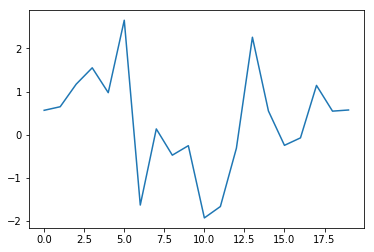

In [6]:
x = np.arange(len(y))
plt.plot(x,y)

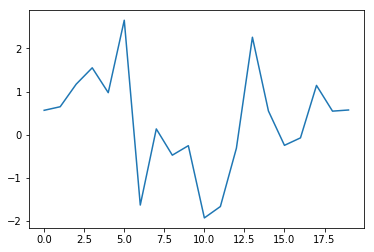

In [7]:
plt.plot(y)

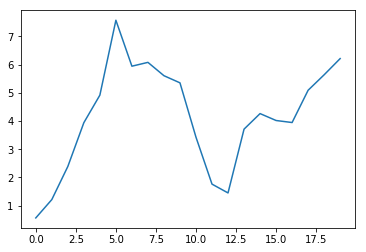

In [8]:
plt.plot(y.cumsum())

Text(0.5,1,'A Simple Plot')

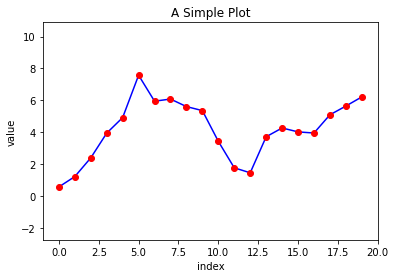

In [9]:
plt.plot(y.cumsum(), 'b', lw=1.5)
plt.plot(y.cumsum(), 'ro')
plt.grid(False)
plt.axis('equal')
plt.xlim(-1, 20)
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

In [10]:
y=np.random.standard_normal((20,2)).cumsum(axis=0)

Text(0.5,1,'A Simple Plot')

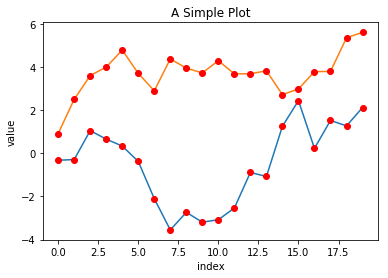

In [11]:
plt.plot(y, lw=1.5)
plt.plot(y, 'ro')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

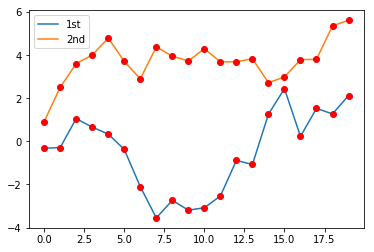

In [12]:
plt.plot(y[:,0], label='1st')
plt.plot(y[:,1], label='2nd')
plt.plot(y,'ro')
plt.legend(loc=0) # label to optimal position

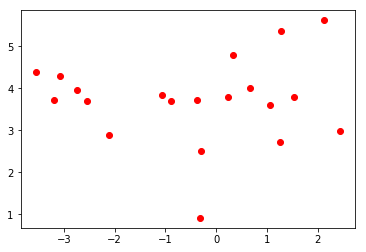

In [13]:
plt.plot(y[:,0], y[:,1], 'ro')

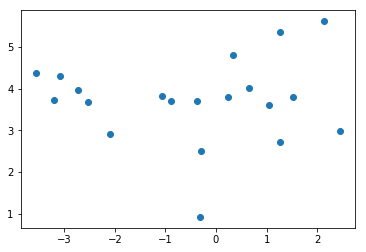

In [14]:
plt.scatter(y[:,0], y[:,1], marker='o')

In [15]:
y = np.random.standard_normal((1000,2))
c = np.random.randint(0,10,len(y))

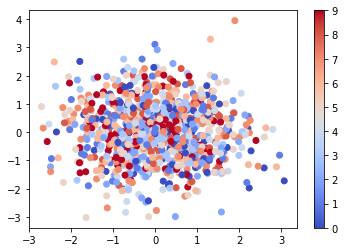

In [16]:
plt.scatter(y[:,0], y[:, 1],
           c=c,
           cmap='coolwarm',
           marker='o')
plt.colorbar()

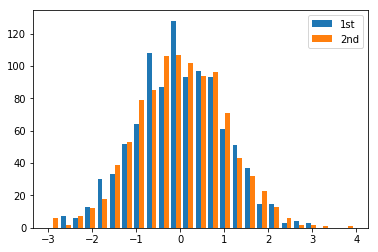

In [17]:
plt.hist(y, label=['1st', '2nd'], bins=25)
plt.legend(loc=0)

([array([  1.,   9.,  13.,  33.,  44.,  62., 124., 114., 149., 118., 123.,
          82.,  56.,  40.,  16.,   9.,   5.,   2.,   0.,   0.]),
  array([  8.,  13.,  25.,  55.,  95., 145., 224., 242., 276., 248., 242.,
         176., 108.,  74.,  38.,  18.,   7.,   4.,   1.,   1.])],
 array([-3.02127376, -2.67277777, -2.32428178, -1.9757858 , -1.62728981,
        -1.27879382, -0.93029783, -0.58180185, -0.23330586,  0.11519013,
         0.46368612,  0.8121821 ,  1.16067809,  1.50917408,  1.85767007,
         2.20616605,  2.55466204,  2.90315803,  3.25165402,  3.60015   ,
         3.94864599]),
 <a list of 2 Lists of Patches objects>)

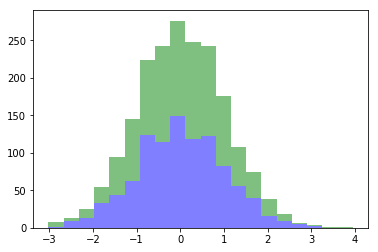

In [18]:
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'],
        stacked=True, bins=20, alpha=0.5)

[Text(0,0,'1st'), Text(0,0,'2nd')]

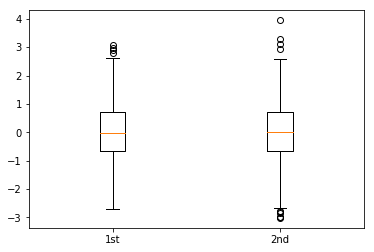

In [19]:
fig, ax = plt.subplots()
plt.boxplot(y)
plt.setp(ax, xticklabels=['1st', '2nd']) # change style

In [20]:
def func(X):
    return 0.5 * np.exp(x) + 1
a, b = 0.5, 1.5
x = np.linspace(0,2)
y = func(x)
Ix = np.linspace(a,b)
Iy = func(Ix)
verts = [(a,0)] + list(zip(Ix, Iy)) + [(b,0)]

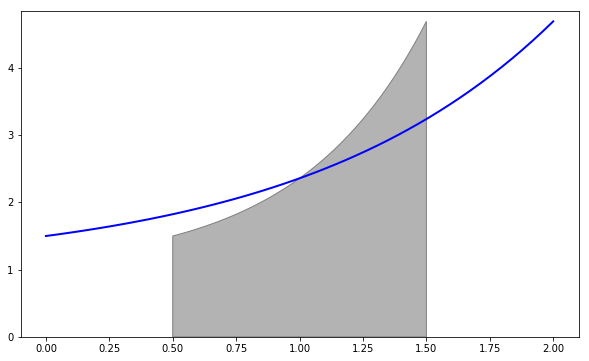

In [21]:
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(x,y,'b', linewidth=2)
plt.ylim(bottom=0)
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

In [22]:
# 3D

In [23]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike

array([ 50.        ,  54.34782609,  58.69565217,  63.04347826,
        67.39130435,  71.73913043,  76.08695652,  80.43478261,
        84.7826087 ,  89.13043478,  93.47826087,  97.82608696,
       102.17391304, 106.52173913, 110.86956522, 115.2173913 ,
       119.56521739, 123.91304348, 128.26086957, 132.60869565,
       136.95652174, 141.30434783, 145.65217391, 150.        ])

In [24]:
strike, ttm = np.meshgrid(strike, ttm)

In [25]:
iv = (strike - 100) ** 2 / (100 * strike) / ttm

In [26]:
from mpl_toolkits.mplot3d import Axes3D

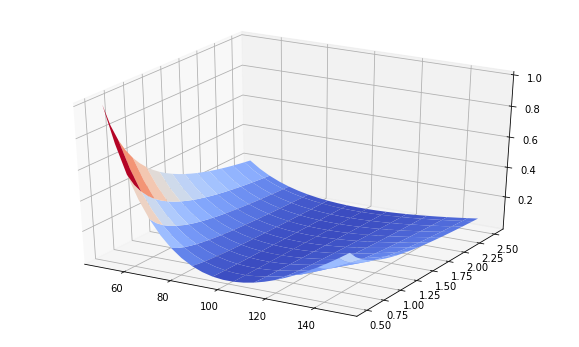

In [27]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                      cmap=plt.cm.coolwarm, linewidth=0.5,
                      antialiased=True)

In [28]:
# Interactive 2D Plot

In [54]:
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo
%matplotlib inline

In [55]:
plyo.init_notebook_mode(connected=True)

In [57]:
a = np.random.standard_normal((250, 5)).cumsum(axis=0)
index = pd.date_range('2019-1-1',
                     freq='B',
                     periods=len(a))
df = pd.DataFrame(100 + 5 * a,
                 columns=list('abcde'),
                             index=index)

In [58]:
df.head()

,a,b,c,d,e
2019-01-01,92.935948,96.082013,94.433750,99.307774,90.685227
2019-01-02,77.918865,100.188424,97.996480,99.150249,86.506654
2019-01-03,75.756351,91.759876,102.565402,94.168393,95.225444
2019-01-04,80.143706,86.744508,106.935296,92.882873,89.738069
2019-01-07,85.484926,94.447074,110.372289,87.421694,87.985150


In [59]:
plyo.iplot(
    df.iplot(asFigure=True),
    image='png',
    filename='ply_01'
)

In [45]:
raw = pd.read_csv('fxcm_eur_usd_eod_data.csv', index_col=0, parse_dates=True)

In [46]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 2007-06-03 to 2017-05-31
Data columns (total 10 columns):
Time          2820 non-null object
OpenBid       2820 non-null float64
HighBid       2820 non-null float64
LowBid        2820 non-null float64
CloseBid      2820 non-null float64
OpenAsk       2820 non-null float64
HighAsk       2820 non-null float64
LowAsk        2820 non-null float64
CloseAsk      2820 non-null float64
TotalTicks    2820 non-null int64
dtypes: float64(8), int64(1), object(1)
memory usage: 242.3+ KB


In [47]:
quotes = raw[['OpenAsk', 'HighAsk', 'LowAsk', 'CloseAsk']]
quotes = quotes.iloc[-60:]
quotes.tail()

,OpenAsk,HighAsk,LowAsk,CloseAsk
Date,,,,
2017-05-27,1.11808,1.11808,1.11743,1.11788
2017-05-28,1.11788,1.11906,1.11626,1.11660
2017-05-29,1.11660,1.12064,1.11100,1.11882
2017-05-30,1.11882,1.12530,1.11651,1.12434
2017-05-31,1.12434,1.12574,1.12027,1.12133


In [48]:
qf = cf.QuantFig(
    quotes,
    title = 'EUR/USD Exchange Rate',
    legend='top',
    name='EUR/USD'
)

In [49]:
plyo.iplot(
    qf.iplot(asFigure=True),
    image='png',
    filename='qf_01'
)